# Import libraries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# General view of the dataframe

In [4]:
# Import hospital discharges from 2021 to 2024
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\ProyectoEDA_Egresos_Hospitalarios_2001-2020\data\processed\Discharges_2021-2024_messy.parquet")

In [5]:
# A general idea of the rows and columns
df.head()

,Healthcare facility type,Sex,Age,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year
0,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,ISAPRE,2021,K590,1,1,2021
1,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,NINGUNA,2021,S015,1,1,2021
2,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,ISAPRE,2021,T181,1,1,2021
3,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,FONASA,2021,Q381,1,1,2021
4,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,FONASA,2021,Q531,1,1,2021


In [6]:
# shape of the dataframe
df.shape                         

(6343796, 9)

In [7]:
# Datatypes are as light as possible
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343796 entries, 0 to 1667348
Data columns (total 9 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   Healthcare facility type  category
 1   Sex                       category
 2   Age                       category
 3   Health insurance          category
 4   Year_with_nans            category
 5   Primary diagnosis code    category
 6   Length of stay            int32   
 7   Discharge condition       category
 8   Year                      int16   
dtypes: category(7), int16(1), int32(1)
memory usage: 133.4 MB


In [8]:
# The only numeric column is length of stay: mean a median differ suggesting there are outliers affecting the distribution of the data
df["Length of stay"].describe()  

count    6.343796e+06
mean     6.247676e+00
std      4.637814e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      2.223900e+04
Name: Length of stay, dtype: float64

In [9]:
# Columns in the dataframe
df.columns

Index(['Healthcare facility type', 'Sex', 'Age', 'Health insurance',
       'Year_with_nans', 'Primary diagnosis code', 'Length of stay',
       'Discharge condition', 'Year'],
      dtype='object')

In [10]:
# Apparently the missingness of the data is structured following a pattern
df.isna().sum()

Healthcare facility type    1651836
Sex                          173892
Age                          167677
Health insurance             173892
Year_with_nans               167677
Primary diagnosis code            0
Length of stay                    0
Discharge condition               0
Year                              0
dtype: int64

In [11]:
# Only the "Healthcare facility type" column has many null values (around 26%), but is important to understand the dinamic of the missing values
# before making decisions about them
df.isna().mean()

Healthcare facility type    0.260386
Sex                         0.027411
Age                         0.026432
Health insurance            0.027411
Year_with_nans              0.026432
Primary diagnosis code      0.000000
Length of stay              0.000000
Discharge condition         0.000000
Year                        0.000000
dtype: float64

# Handling missing data on each column

Healthcare facility type

In [14]:
# The facilities are public (SNSS) or private (not SNSS)
df["Healthcare facility type"].value_counts()

Healthcare facility type
Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS       2779010
No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS    1912950
Name: count, dtype: int64

In [15]:
# Out of 1651836 rows that have missing healthcare facility type, there are 167677 patients without identified sex, insurance, age and year of discharge
df.loc[df['Healthcare facility type'].isnull()].isna().sum()

Healthcare facility type    1651836
Sex                          167677
Age                          167677
Health insurance             167677
Year_with_nans               167677
Primary diagnosis code            0
Length of stay                    0
Discharge condition               0
Year                              0
dtype: int64

In [16]:
# Always when age, sex, health insurance or year_with_nans are missing, there are not valid values in healthcare facility type and the rest of the variables
# This is proven beacuse the dataframes are empty
print(df[df['Healthcare facility type'].notna() & df['Age'].isna() & df['Sex'].notna() & df['Health insurance'].notna() & df['Year_with_nans'].notna()])
print(df[df['Healthcare facility type'].notna() & df['Age'].notna() & df['Sex'].isna() & df['Health insurance'].notna() & df['Year_with_nans'].notna()])
print(df[df['Healthcare facility type'].notna() & df['Age'].notna() & df['Sex'].notna() & df['Health insurance'].isna() & df['Year_with_nans'].notna()])
print(df[df['Healthcare facility type'].notna() & df['Age'].notna() & df['Sex'].notna() & df['Health insurance'].notna() & df['Year_with_nans'].isna()])

Empty DataFrame
Columns: [Healthcare facility type, Sex, Age, Health insurance, Year_with_nans, Primary diagnosis code, Length of stay, Discharge condition, Year]
Index: []
Empty DataFrame
Columns: [Healthcare facility type, Sex, Age, Health insurance, Year_with_nans, Primary diagnosis code, Length of stay, Discharge condition, Year]
Index: []
Empty DataFrame
Columns: [Healthcare facility type, Sex, Age, Health insurance, Year_with_nans, Primary diagnosis code, Length of stay, Discharge condition, Year]
Index: []
Empty DataFrame
Columns: [Healthcare facility type, Sex, Age, Health insurance, Year_with_nans, Primary diagnosis code, Length of stay, Discharge condition, Year]
Index: []


In [17]:
# By the other hand, there are rows that that having missing healthcare facility type are valid in the rest of the columns.
# It does not happen in the opposite way around as shown above
df[df['Healthcare facility type'].isna() & df['Age'].notna() & df['Sex'].notna() & df['Health insurance'].notna() & df['Year_with_nans'].notna()]

,Healthcare facility type,Sex,Age,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year
0,NaN,HOMBRE,1 a 9,FONASA,2023,D180,7,1,2023
1,NaN,HOMBRE,1 a 9,FONASA,2023,T181,2,1,2023
2,NaN,HOMBRE,1 a 9,FONASA,2023,K358,1,1,2023
3,NaN,HOMBRE,1 a 9,FONASA,2023,K353,6,1,2023
4,NaN,HOMBRE,1 a 9,FONASA,2023,K353,1,1,2023
...,...,...,...,...,...,...,...,...,...
1484154,NaN,HOMBRE,menor de un año,FONASA,2023,Q249,2,1,2023
1484155,NaN,HOMBRE,menor de un año,FONASA,2023,D807,3,1,2023
1484156,NaN,HOMBRE,menor de un año,FONASA,2023,A499,4,1,2023
1484157,NaN,HOMBRE,menor de un año,FONASA,2023,T182,1,1,2023


In [18]:
# The missing values for healthcare facility type when the rest of the columns are valid can follow a certaint pattern.
# In this case, always when the healthcare facility type is missing, the year of discharge was 2023
df[df['Healthcare facility type'].isna() & df['Age'].notna() & df['Sex'].notna() & df['Health insurance'].notna() & df['Year_with_nans'].notna()]["Year_with_nans"].value_counts()

Year_with_nans
2023    1484159
2021          0
2022          0
2024          0
Name: count, dtype: int64

In [19]:
# Healthcare facility type is missing for the year 2023 or when the year or age is also missing.
# 167677 (year, insurance, sex and age is missing) + 1484159 (year is 2023) = 1651836 (total amount of NaNs for healthvare facility type column)
# Example
example = df[df['Healthcare facility type'].isna()& df['Age'].isna()].equals(df[df['Healthcare facility type'].isna()& df['Year_with_nans'].isna()])
print("Dataframes are equeal?",example)

Dataframes are equeal? True


In [20]:
# The proportion of men and women when the healthcare facility type is missing follow an usual pattern, where there are more women in hospital
df[df['Healthcare facility type'].isna()].Sex.value_counts()

Sex
MUJER                        854914
HOMBRE                       629245
1                                 0
2                                 0
3                                 0
9                                 0
INTERSEX (INDETERMINDADO)         0
Name: count, dtype: int64

In [21]:
# The healthcare insurance also follow an usual pattern, where Fonasa (public insurance) is more frequent than Isapre (private insurance)
df[df['Healthcare facility type'].isna()]["Health insurance"].value_counts()

Health insurance
FONASA         1148342
ISAPRE          275904
DESCONOCIDO      16496
DIPRECA          13588
CAPREDENA        11553
NINGUNA          10170
SISA              8106
Name: count, dtype: int64

In [22]:
nan_facility_type_age = df[df['Healthcare facility type'].isna()]["Age"].value_counts(normalize=True) * 100
nan_facility_type_age

Age
30 a 39                     16.185597
60 a 69                     13.870818
20 a 29                     12.336347
50 a 59                     11.689516
70 a 79                     11.439340
40 a 49                     11.325539
80 a 89                      6.382133
1 a 9                        6.133844
10 a 19                      5.865477
menor de un año              3.350248
90 y más                     1.421142
60 A 64 AÑOS                 0.000000
80 A 84 AÑOS                 0.000000
70 A 74 AÑOS                 0.000000
7 A 27 DIAS                  0.000000
85 A MAS                     0.000000
65 A 69 AÑOS                 0.000000
menor a 7 días               0.000000
75 A 79 AÑOS                 0.000000
1 A 4 AÑOS                   0.000000
55 A 59 AÑOS                 0.000000
50 A 54 AÑOS                 0.000000
45 A 49 AÑOS                 0.000000
40 A 44 AÑOS                 0.000000
35 A 39 AÑOS                 0.000000
30 A 34 AÑOS                 0.000000
28 DIAS 

In [23]:
all_facility_type_age = df.Age.value_counts(normalize=True) * 100
all_facility_type_age

Age
30 a 39                     8.160044
60 a 69                     6.658372
20 a 29                     6.282068
50 a 59                     5.767959
40 a 49                     5.639415
70 a 79                     5.460598
30 A 34 AÑOS                4.468923
35 A 39 AÑOS                3.951608
25 A 29 AÑOS                3.699864
60 A 64 AÑOS                3.478706
65 A 69 AÑOS                3.378044
55 A 59 AÑOS                3.264720
40 A 44 AÑOS                3.113460
80 a 89                     3.064416
70 A 74 AÑOS                2.981549
1 a 9                       2.914144
50 A 54 AÑOS                2.892885
45 A 49 AÑOS                2.840975
10 a 19                     2.831455
20 A 24 AÑOS                2.635150
75 A 79 AÑOS                2.609341
85 A MAS                    1.997031
80 A 84 AÑOS                1.936961
menor de un año             1.745692
15 A 19 AÑOS                1.636675
1 A 4 AÑOS                  1.449308
5 A 9 AÑOS                  1.4029

In [24]:
# The age groups overlap with each other. For example "Age 30 to 39" includes "Age 30 to 34" and "Age 35 to 39"
# For some reason this overlapping does not happen when the healtcare facility type is nan. See the cell for more details.
# The way the data was grouped shows different percents for healthcare facility type when is valid or NaN, but in reality are quite similar. See example below
# So the question is: is there a reason behind of grouping the age of the people differently when the healthcare facility type is valid compared to NaN?
# When the column "Age" is cleaned, this is going to be clearer
pd.DataFrame({'all_facility_type_age': all_facility_type_age, 'nan_facility_type_age': nan_facility_type_age}).sort_values(by=['all_facility_type_age'], ascending = False)

,all_facility_type_age,nan_facility_type_age
Age,,
30 a 39,8.160044,16.185597
60 a 69,6.658372,13.870818
20 a 29,6.282068,12.336347
50 a 59,5.767959,11.689516
40 a 49,5.639415,11.325539
70 a 79,5.460598,11.439340
30 A 34 AÑOS,4.468923,0.000000
35 A 39 AÑOS,3.951608,0.000000
25 A 29 AÑOS,3.699864,0.000000


In [25]:
# Example:

# Valid heathcare facility types for Age 30-39, 30-34, 35-39, respectively
print(8.160044 + 4.468923 + 3.951608)
# NaN heathcare facility types for Age 30-39, 30-34, 35-39, respectively
print(16.185597 + 0 + 0)

16.580575
16.185597


Sex

In [27]:
# There are different ways to label each sex, so a function is defined to fix that and consider just men and women
df["Sex"].value_counts()

Sex
2                            1789953
MUJER                        1761041
1                            1338190
HOMBRE                       1280652
3                                 49
INTERSEX (INDETERMINDADO)         15
9                                  4
Name: count, dtype: int64

In [28]:
  def sexo(x):
        if x == "2" or x == "MUJER":
            x = "Mujer"
        elif x == "1" or x == "HOMBRE":
            x = "Hombre"
        else:
            x = "Otro"
        
        return x

In [29]:
# Function is applied over the column
df["Sex"] = df["Sex"].apply(sexo)

In [30]:
# Just men and women are kept in the dataframe
df = df[df['Sex'] != 'Otro']

In [31]:
# There are more women than men, as usual
df["Sex"].value_counts()

Sex
Mujer     3550994
Hombre    2618842
Name: count, dtype: int64

In [32]:
# is there another variable related to the missingness in sex?

In [33]:
# Apparently the missingess is structured, so this will be explored
df.loc[df['Sex'].isnull()].isna().sum()

Healthcare facility type    167677
Sex                         173892
Age                         167677
Health insurance            173892
Year_with_nans              167677
Primary diagnosis code           0
Length of stay                   0
Discharge condition              0
Year                             0
dtype: int64

In [34]:
# A dataframe that contains only rows when value column in sex is missing is created
nan_sex = df.loc[df['Sex'].isnull()]

In [35]:
nan_sex

,Healthcare facility type,Sex,Age,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year
1557549,NaN,NaN,NaN,NaN,NaN,I702,16,1,2022
1557550,NaN,NaN,NaN,NaN,NaN,N764,9,1,2022
1557551,NaN,NaN,NaN,NaN,NaN,S299,5,1,2022
1557552,NaN,NaN,NaN,NaN,NaN,P220,6,1,2022
1557553,NaN,NaN,NaN,NaN,NaN,P220,20,1,2022
...,...,...,...,...,...,...,...,...,...
1667344,Pertenecientes al Sistema Nacional de Servicio...,NaN,7 A 27 DIAS,NaN,2024,P073,4,1,2024
1667345,Pertenecientes al Sistema Nacional de Servicio...,NaN,7 A 27 DIAS,NaN,2024,P590,2,1,2024
1667346,Pertenecientes al Sistema Nacional de Servicio...,NaN,7 A 27 DIAS,NaN,2024,P599,2,1,2024
1667347,Pertenecientes al Sistema Nacional de Servicio...,NaN,menor a 7 días,NaN,2024,E250,52,1,2024


In [36]:
# loop over the columns to count the values on each one
# Age, year_with_nans and healthcare facility type have 6215 values that are valid when in sex are NaN. The year is always 2024
for col in nan_sex.columns:
    print(f"Value counts for '{col}':")
    print(nan_sex[col].value_counts(dropna = False))
    print("\n" + "-"*40 + "\n")

Value counts for 'Healthcare facility type':
Healthcare facility type
NaN                                                                  167677
No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS      4620
Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS         1595
Name: count, dtype: int64

----------------------------------------

Value counts for 'Sex':
Sex
NaN    173892
Name: count, dtype: int64

----------------------------------------

Value counts for 'Age':
Age
NaN                         167677
65 A 69 AÑOS                   528
30 A 34 AÑOS                   480
60 A 64 AÑOS                   471
70 A 74 AÑOS                   459
35 A 39 AÑOS                   450
40 A 44 AÑOS                   393
45 A 49 AÑOS                   359
50 A 54 AÑOS                   359
55 A 59 AÑOS                   353
25 A 29 AÑOS                   345
75 A 79 AÑOS                   273
20 A 24 AÑOS                   269
menor a 7 días                 259
85 A

In [37]:
# Example: Total valid values for column "Age" and "Healthcare facility type" when "Sex" is not valid
print(nan_sex["Age"].value_counts(dropna = True).sum())
print(nan_sex["Healthcare facility type"].value_counts(dropna = True).sum())

6215
6215


When sex is NaN this is the summary of what happens in the other columns:

1. Age: There are 6215 valid values distributed among the different age ranges. The rest are NaNs
2. Healthcare facility type: There are 6215 valid values. The rest are NaNs, also when the year is 2023
3. Health insurance: if the sex is not valid, the same happens with the health insurance. 0 valid values here and all NaNs
4. Year_with_nans: There are 6215 valid values only for year 2024. The rest are NaNs
5. Primary diagnosis code, Length of stay and discharge condition: All valid values beacuse there are not NaNs in the whole dataframe
6. Year (column created by me based on the year of the dataframe): The missingness of the data will not be analyzed with this column as it was created by me

Age

In [40]:
# There are many age groups and some overlap with each other, so it is necessary tu customize it
df["Age"].value_counts()

Age
30 a 39                     503974
60 a 69                     411229
20 a 29                     387988
50 a 59                     356236
40 a 49                     348297
70 a 79                     337253
30 A 34 AÑOS                276004
35 A 39 AÑOS                244056
25 A 29 AÑOS                228508
60 A 64 AÑOS                214849
65 A 69 AÑOS                208632
55 A 59 AÑOS                201633
40 A 44 AÑOS                192291
80 a 89                     189262
70 A 74 AÑOS                184144
1 a 9                       179981
50 A 54 AÑOS                178668
45 A 49 AÑOS                175462
10 a 19                     174869
20 A 24 AÑOS                162748
75 A 79 AÑOS                161156
85 A MAS                    123338
80 A 84 AÑOS                119629
menor de un año             107806
15 A 19 AÑOS                101076
1 A 4 AÑOS                   89511
5 A 9 AÑOS                   86648
10 A 14 AÑOS                 81169
menor a 7 días  

In [41]:
# According to the previous findings, the rows are NaN in 'Healthcare facility type', 'Sex', Health insurance', 'Year_with_nans' and 'Age' for some reason
# Also there are 6215 values that are valid for 'Age', 'Healthcare facility type' and 'Health insurance', while NaN in the rest of the columns mentioned
df["Age"].isna().sum()

167677

In [42]:
# A quick look of the data, whose dataframe is the same as in 'years_with_nans'. Look cell below
nan_age = df.loc[df['Age'].isnull()]
nan_years = df.loc[df["Year_with_nans"].isnull()]

In [43]:
# Dataframes are identic
nan_age.equals(nan_years)

True

In [44]:
nan_age.shape

(167677, 9)

In [45]:
nan_age.head()

,Healthcare facility type,Sex,Age,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year
1557549,NaN,NaN,NaN,NaN,NaN,I702,16,1,2022
1557550,NaN,NaN,NaN,NaN,NaN,N764,9,1,2022
1557551,NaN,NaN,NaN,NaN,NaN,S299,5,1,2022
1557552,NaN,NaN,NaN,NaN,NaN,P220,6,1,2022
1557553,NaN,NaN,NaN,NaN,NaN,P220,20,1,2022


# Valid values column Age

In [47]:
# Back to the valid values in the column
age_groups = list(df["Age"].unique())

In [48]:
# There are many groups and some of them overlap with each other. It is a good choice to reduce them: helps future modeling and visualizations
age_groups

['1 A 4 AÑOS',
 '10 A 14 AÑOS',
 '15 A 19 AÑOS',
 '2 MESES A MENOS DE 1 AÑO',
 '20 A 24 AÑOS',
 '25 A 29 AÑOS',
 '28 DIAS A 2 MES',
 '30 A 34 AÑOS',
 '35 A 39 AÑOS',
 '40 A 44 AÑOS',
 '45 A 49 AÑOS',
 '5 A 9 AÑOS',
 '50 A 54 AÑOS',
 '55 A 59 AÑOS',
 '60 A 64 AÑOS',
 '65 A 69 AÑOS',
 '7 A 27 DIAS',
 '70 A 74 AÑOS',
 '75 A 79 AÑOS',
 '80 A 84 AÑOS',
 '85 A MAS',
 'menor a 7 días',
 '1 a 9',
 '10 a 19',
 '20 a 29',
 '30 a 39',
 '40 a 49',
 '50 a 59',
 '60 a 69',
 '70 a 79',
 '80 a 89',
 '90 y más',
 'menor de un año',
 nan]

In [49]:
# This function helps to fix the format of the data
def age(x):
    if x == "menor de un año" or x == "menor a 7 días" or x == "2 MESES A MENOS DE 1 AÑO" or x == "7 A 27 DIAS" or x == "28 DIAS A 2 MES":
        x = "0 a 1"
    elif x == "90 y más":
        x = "90 a más"
    elif x == "85 A MAS":
        x = "85 a más"
    return x

In [50]:
# The function is applied and only one more step is needed to have the same format across the age groups
df["Age"] = df["Age"].apply(age)
age_groups = list(df["Age"].unique())
df["Age"] = df['Age'].str.lower().str.replace('años', '').str.rstrip()
age_groups_updated = list(df["Age"].unique())

In [51]:
age_groups_updated

['1 a 4',
 '10 a 14',
 '15 a 19',
 '0 a 1',
 '20 a 24',
 '25 a 29',
 '30 a 34',
 '35 a 39',
 '40 a 44',
 '45 a 49',
 '5 a 9',
 '50 a 54',
 '55 a 59',
 '60 a 64',
 '65 a 69',
 '70 a 74',
 '75 a 79',
 '80 a 84',
 '85 a más',
 '1 a 9',
 '10 a 19',
 '20 a 29',
 '30 a 39',
 '40 a 49',
 '50 a 59',
 '60 a 69',
 '70 a 79',
 '80 a 89',
 '90 a más',
 nan]

In [52]:
# Split the string into 2 values inside a list
df["Age"] = df["Age"].str.split("a")

In [53]:
# Drop nan values to only have a list of lists with the minimum and maximum value ina group age as strings
ages_list = df["Age"].dropna()

In [54]:
# Step: Keep only rows where 'más' is exactly one of the elements in the list
ages_with_mas = ages_list[ages_list.apply(lambda x: x[0].strip() == 'más' or x[1].strip() == 'más')]


In [55]:
ages_with_mas

254675     [85 ,  más]
254676     [85 ,  más]
254677     [85 ,  más]
254678     [85 ,  más]
254679     [85 ,  más]
              ...     
1667156    [85 ,  más]
1667157    [85 ,  más]
1667158    [85 ,  más]
1667159    [85 ,  más]
1667160    [85 ,  más]
Name: Age, Length: 168136, dtype: object

In [56]:
# The string "más" is replaced by age 120 as a fixed maximum value to consider and strings are turned into integers
def convert_age_range(age_list):
    start = int(age_list[0].strip())
    end_raw = age_list[1].strip()
    end = 120 if end_raw == 'más' else int(end_raw)
    return [start, end]

ages_final = ages_list.apply(convert_age_range)


In [57]:
ages_final

0          [1, 4]
1          [1, 4]
2          [1, 4]
3          [1, 4]
4          [1, 4]
            ...  
1667344    [0, 1]
1667345    [0, 1]
1667346    [0, 1]
1667347    [0, 1]
1667348    [0, 1]
Name: Age, Length: 6176051, dtype: object

In [58]:
# Step 0: Save original index
original_index = df.index

# Step 1: Reset index to have a unique one for safe operations
df_reset = df.reset_index(drop=True)

# Step 2: Drop NaNs in Age column and transform those rows
ages_list = df_reset["Age"].dropna()
ages_final = ages_list.apply(convert_age_range)

# Step 3: Create a new empty column in df_reset
df_reset["Age_range"] = pd.NA

# Step 4: Assign transformed values back to the matching rows by index
df_reset.loc[ages_final.index, "Age_range"] = ages_final

# Step 5: Restore original index to df_reset
df_reset.index = original_index

# Optional: If you want, assign df_reset back to df or keep working with df_reset
df = df_reset


In [59]:
# Replace missing Age_range with [pd.NA, pd.NA] to avoid errors
df['Age_range_filled'] = df['Age_range'].apply(lambda x: x if isinstance(x, list) else [pd.NA, pd.NA])

# Now split into two columns
df[['age_min', 'age_max']] = pd.DataFrame(df['Age_range_filled'].tolist(), index=df.index)


In [60]:
df

,Healthcare facility type,Sex,Age,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age_range,Age_range_filled,age_min,age_max
0,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",ISAPRE,2021,K590,1,1,2021,"[1, 4]","[1, 4]",1,4
1,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",NINGUNA,2021,S015,1,1,2021,"[1, 4]","[1, 4]",1,4
2,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",ISAPRE,2021,T181,1,1,2021,"[1, 4]","[1, 4]",1,4
3,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",FONASA,2021,Q381,1,1,2021,"[1, 4]","[1, 4]",1,4
4,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",FONASA,2021,Q531,1,1,2021,"[1, 4]","[1, 4]",1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667344,Pertenecientes al Sistema Nacional de Servicio...,NaN,"[0 , 1]",NaN,2024,P073,4,1,2024,"[0, 1]","[0, 1]",0,1
1667345,Pertenecientes al Sistema Nacional de Servicio...,NaN,"[0 , 1]",NaN,2024,P590,2,1,2024,"[0, 1]","[0, 1]",0,1
1667346,Pertenecientes al Sistema Nacional de Servicio...,NaN,"[0 , 1]",NaN,2024,P599,2,1,2024,"[0, 1]","[0, 1]",0,1
1667347,Pertenecientes al Sistema Nacional de Servicio...,NaN,"[0 , 1]",NaN,2024,E250,52,1,2024,"[0, 1]","[0, 1]",0,1


In [61]:
df["Age_range_filled"].value_counts()

Age_range_filled
[30, 39]        503974
[60, 69]        411229
[20, 29]        387988
[50, 59]        356236
[40, 49]        348297
[70, 79]        337253
[30, 34]        276004
[35, 39]        244056
[25, 29]        228508
[60, 64]        214849
[0, 1]          212642
[65, 69]        208632
[55, 59]        201633
[40, 44]        192291
[80, 89]        189262
[70, 74]        184144
[1, 9]          179981
[50, 54]        178668
[45, 49]        175462
[10, 19]        174869
[<NA>, <NA>]    167677
[20, 24]        162748
[75, 79]        161156
[85, 120]       123338
[80, 84]        119629
[15, 19]        101076
[1, 4]           89511
[5, 9]           86648
[10, 14]         81169
[90, 120]        44798
Name: count, dtype: int64

In [62]:
# A copy of the original dataframe is made to work safely. The plan is to set the age ranges and merge the ones that overlap with each other
df_age = df.copy()

In [63]:
def fix_age_ranges(x):
    # list of age lists
    age_range_list = [[0, 1], [1, 9], [10, 19], [20, 29], [30, 39], [40, 49], [50, 59], [60, 69], [70, 79], [80, 120]]
    # value in column "age_range_filled"
    rango_evaluado = x
    new_range = rango_evaluado.copy()
    # Logic of the loop
    for l in age_range_list:
        if pd.isna(rango_evaluado[0]) or pd.isna(rango_evaluado[1]):
            continue
        elif rango_evaluado[0] >= l[0] and rango_evaluado[1] <= l[1]:
            rango_evaluado = l
            new_range = [rango_evaluado[0], rango_evaluado[1]]
            break
    return new_range

In [64]:
# Function is applied
df_age["Age_range_filled"] = df_age["Age_range_filled"].apply(fix_age_ranges)

In [65]:
# The number of age groups is less and those which were overlapping now belong to the same one
df_age["Age_range_filled"].value_counts()

Age_range_filled
[30, 39]        1024034
[60, 69]         834710
[20, 29]         779244
[50, 59]         736537
[40, 49]         716050
[70, 79]         682553
[80, 120]        477027
[10, 19]         357114
[1, 9]           356140
[0, 1]           212642
[<NA>, <NA>]     167677
Name: count, dtype: int64

In [66]:
# Split the updated 'Age_range_filled' into two columns directly
df_age[['age_min', 'age_max']] = pd.DataFrame(df_age['Age_range_filled'].tolist(), index=df_age.index)

In [67]:
# Save the changes in the original dataframe
df = df_age

In [68]:
df.head()

,Healthcare facility type,Sex,Age,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age_range,Age_range_filled,age_min,age_max
0,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",ISAPRE,2021,K590,1,1,2021,"[1, 4]","[1, 9]",1,9
1,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",NINGUNA,2021,S015,1,1,2021,"[1, 4]","[1, 9]",1,9
2,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",ISAPRE,2021,T181,1,1,2021,"[1, 4]","[1, 9]",1,9
3,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",FONASA,2021,Q381,1,1,2021,"[1, 4]","[1, 9]",1,9
4,No Pertenecientes al Sistema Nacional de Servi...,Hombre,"[1 , 4]",FONASA,2021,Q531,1,1,2021,"[1, 4]","[1, 9]",1,9


In [69]:
# Drop intermediate columns
df = df.drop(columns=['Age_range', 'age_min', "age_max", "Age"])

In [70]:
# Rename column for future merging with data from 2001 to 2020
df.rename(columns={'Age_range_filled': 'Age'}, inplace=True)

In [71]:
# Set NaNs as pandas NaNs to perform future analysis effectively
df['Age'] = df['Age'].apply(lambda x: pd.NA if isinstance(x, list) and all(pd.isna(i) for i in x) else x)

In [72]:
df.tail()

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
1667344,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P073,4,1,2024,"[0, 1]"
1667345,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P590,2,1,2024,"[0, 1]"
1667346,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P599,2,1,2024,"[0, 1]"
1667347,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,E250,52,1,2024,"[0, 1]"
1667348,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P073,2,2,2024,"[0, 1]"


In [73]:
df.shape

(6343728, 9)

Health insurance

In [75]:
# Only Fonasa and Isapre will be considered in the analysis
df["Health insurance"].value_counts()

Health insurance
FONASA         4623950
ISAPRE         1205759
DESCONOCIDO      86854
DIPRECA          78281
NINGUNA          77315
CAPREDENA        56787
SISA             40890
Name: count, dtype: int64

In [76]:
# Function to delete values that are not Fonasa or Isapre
def insurance(x):
    if x == "FONASA":
        x = "Fonasa"
    elif x == "ISAPRE":
        x = "Isapre"
    else:
        x = "Eliminar"
        
    return x

In [77]:
# Applying function
df["Health insurance"] = df["Health insurance"].apply(insurance)

In [78]:
# Filering dataframe and deleting other values
df = df[df["Health insurance"]!= "Eliminar"]

In [79]:
# dataframe that includes rows where health insurance is nan
nan_insurance = df.loc[df['Health insurance'].isnull()]

In [80]:
df.shape

(6003601, 9)

Year_with_nans

In [82]:
# Discharges grew over the years
df["Year_with_nans"].value_counts(dropna = False)

Year_with_nans
2024    1574632
2022    1465952
2023    1424246
2021    1371094
NaN      167677
Name: count, dtype: int64

In [83]:
# Remind sex and health insurance have 6125 extra nan values, but all columns share 167.677 NaN values
df.loc[df["Year_with_nans"].isnull()].isna().sum()

Healthcare facility type    167677
Sex                         167677
Health insurance            167677
Year_with_nans              167677
Primary diagnosis code           0
Length of stay                   0
Discharge condition              0
Year                             0
Age                         167677
dtype: int64

# Handling duplicates

In [85]:
# copy of the dataframe to work safely
df_duplicates = df.copy()

In [86]:
# Lists are not hashable so in the column "Age" are turned into tuples
df_duplicates['Age'] = df_duplicates['Age'].apply(lambda x: tuple(x) if type(x) is list else x)

In [87]:
# Considering there are not patient IDs or hospital name linked to each row is not possible to make a distinction between data entry issues and real patients
# when rows are duplicated, so no data will be deleted to avoid losing valuable information
df_duplicates[df_duplicates.duplicated(keep=False)]

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
0,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Isapre,2021,K590,1,1,2021,"(1, 9)"
2,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Isapre,2021,T181,1,1,2021,"(1, 9)"
3,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q381,1,1,2021,"(1, 9)"
4,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q531,1,1,2021,"(1, 9)"
5,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q539,1,1,2021,"(1, 9)"
...,...,...,...,...,...,...,...,...,...
1667335,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,C189,2,1,2024,"(40, 49)"
1667336,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,C189,2,1,2024,"(40, 49)"
1667344,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P073,4,1,2024,"(0, 1)"
1667345,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P590,2,1,2024,"(0, 1)"


In [88]:
# 74,6% of values are duplicated at least once. It would be a mistake to delete them both because are too many and maybe are not data entry issues
df_duplicates.duplicated().sum() / len(df) * 100

74.65321229708637

In [89]:
# This shows the count of duplicates, or how many times a value is duplicated; for example one of them is 7634 times
# So it is important to see which are those values with many duplicates
df_duplicates.value_counts().value_counts()

count
1       744294
2       156171
3        68069
4        37578
5        23982
         ...  
678          1
677          1
674          1
671          1
7634         1
Name: count, Length: 822, dtype: int64

In [90]:
# Many duplicates are in the birth and they will be deleted as the do not represent a disease or the linked problems are external to the mother

# Example of 1 row that has 671 duplicates
row_counts = df_duplicates.apply(lambda row: tuple(row), axis=1).value_counts()
rows_x_times = row_counts[row_counts == 7634].index
df_result = df_duplicates[df_duplicates.apply(lambda row: tuple(row), axis=1).isin(rows_x_times)]


In [91]:
df_result.head()

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
177905,Pertenecientes al Sistema Nacional de Servicio...,Mujer,Fonasa,2022,O800,2,1,2022,"(20, 29)"
177914,Pertenecientes al Sistema Nacional de Servicio...,Mujer,Fonasa,2022,O800,2,1,2022,"(20, 29)"
177930,Pertenecientes al Sistema Nacional de Servicio...,Mujer,Fonasa,2022,O800,2,1,2022,"(20, 29)"
177943,Pertenecientes al Sistema Nacional de Servicio...,Mujer,Fonasa,2022,O800,2,1,2022,"(20, 29)"
177968,Pertenecientes al Sistema Nacional de Servicio...,Mujer,Fonasa,2022,O800,2,1,2022,"(20, 29)"


In [92]:
df_duplicates = df_duplicates[~df_duplicates["Primary diagnosis code"].str.startswith("O")]

In [93]:
df_duplicates

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
0,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Isapre,2021,K590,1,1,2021,"(1, 9)"
2,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Isapre,2021,T181,1,1,2021,"(1, 9)"
3,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q381,1,1,2021,"(1, 9)"
4,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q531,1,1,2021,"(1, 9)"
5,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q539,1,1,2021,"(1, 9)"
...,...,...,...,...,...,...,...,...,...
1667344,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P073,4,1,2024,"(0, 1)"
1667345,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P590,2,1,2024,"(0, 1)"
1667346,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,P599,2,1,2024,"(0, 1)"
1667347,Pertenecientes al Sistema Nacional de Servicio...,NaN,NaN,2024,E250,52,1,2024,"(0, 1)"


In [94]:
df_duplicates.value_counts().sort_values(ascending = True).value_counts()

count
1       727907
2       151022
3        65338
4        35895
5        22836
         ...  
596          1
600          1
602          1
606          1
3085         1
Name: count, Length: 642, dtype: int64

In [95]:
# This is a problem reltaed to amygdala. In this case the duplicates show men between 1 to 9 years old in the 2024. The disease it is very common
# Despite the amount of duplicates for the same row they will not be deleted as they do not neceesarily represent a data entry issue

# Example of 1 row that has 3085 duplicates
row_counts = df_duplicates.apply(lambda row: tuple(row), axis=1).value_counts()
rows_x_times = row_counts[row_counts == 3085].index
df_result = df_duplicates[df_duplicates.apply(lambda row: tuple(row), axis=1).isin(rows_x_times)]




In [96]:
df_result

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
21,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
29,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
30,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
45,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
771,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
...,...,...,...,...,...,...,...,...,...
1642398,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
1642399,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
1642400,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"
1642402,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2024,J353,1,1,2024,"(1, 9)"


In [97]:
df.shape

(6003601, 9)

# Column Primary diagnosis code analysis

# Guiding question: ¿Is this structured missingness biasing or distorting the insights I can draw from the complete variables?

4 Dataframes to be created to compare valid values in Primary diagnosis code, Length of stay and Discharge condition columns

-> only valid values in the dataframe
-> when 167677 are nan in all the rest of the columns
-> when 6215 are valid for Age and Year_with_nans but NaN in Sex and Health insurance
-> when only are NaN in Healthcare facility type (it matches that the year_with_nans is always 2023)

Only valid values in the dataframe

In [102]:
# Copy of the dataframe to edit safely
df_pld_valid = df.copy()

In [103]:
# Just keep valid values from the original dataframe
df_pld_valid = df_pld_valid.dropna()

In [104]:
df.shape

(6003601, 9)

When 167677 are nan in all the rest of the columns

In [106]:
df_167677 = df.copy()

In [107]:
df_167677 = df_167677[df_167677["Age"].isna() & df_167677["Sex"].isna() & df_167677["Healthcare facility type"].isna() & df_167677["Health insurance"].isna() & df_167677["Year_with_nans"].isna()]

When 6215 are valid for Age, healthcare facility type and Year_with_nans but NaN in Sex and Health insurance

In [109]:
df_6215 = df.copy()

In [110]:
df_6215 = df_6215[df_6215["Age"].notna() & df_6215["Sex"].isna() & df_6215["Health insurance"].isna() & df_6215["Year_with_nans"].notna()]

When only are NaN in Healthcare facility type (it matches that the year_with_nans is always 2023)

In [112]:
df_facility_type = df.copy()

In [113]:
mask1 = df_facility_type["Healthcare facility type"].isna()
mask2 = df_facility_type["Year_with_nans"] == "2023"
df_facility_type[mask1 & mask2]

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
0,NaN,Hombre,Fonasa,2023,D180,7,1,2023,"[1, 9]"
1,NaN,Hombre,Fonasa,2023,T181,2,1,2023,"[1, 9]"
2,NaN,Hombre,Fonasa,2023,K358,1,1,2023,"[1, 9]"
3,NaN,Hombre,Fonasa,2023,K353,6,1,2023,"[1, 9]"
4,NaN,Hombre,Fonasa,2023,K353,1,1,2023,"[1, 9]"
...,...,...,...,...,...,...,...,...,...
1484154,NaN,Hombre,Fonasa,2023,Q249,2,1,2023,"[0, 1]"
1484155,NaN,Hombre,Fonasa,2023,D807,3,1,2023,"[0, 1]"
1484156,NaN,Hombre,Fonasa,2023,A499,4,1,2023,"[0, 1]"
1484157,NaN,Hombre,Fonasa,2023,T182,1,1,2023,"[0, 1]"


In [114]:
df_facility_type[df_facility_type["Age"].notna() & df_facility_type["Sex"].notna() & df_facility_type["Health insurance"].notna() & df_facility_type["Year_with_nans"].notna() & df_facility_type["Healthcare facility type"].isna()]

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
0,NaN,Hombre,Fonasa,2023,D180,7,1,2023,"[1, 9]"
1,NaN,Hombre,Fonasa,2023,T181,2,1,2023,"[1, 9]"
2,NaN,Hombre,Fonasa,2023,K358,1,1,2023,"[1, 9]"
3,NaN,Hombre,Fonasa,2023,K353,6,1,2023,"[1, 9]"
4,NaN,Hombre,Fonasa,2023,K353,1,1,2023,"[1, 9]"
...,...,...,...,...,...,...,...,...,...
1484154,NaN,Hombre,Fonasa,2023,Q249,2,1,2023,"[0, 1]"
1484155,NaN,Hombre,Fonasa,2023,D807,3,1,2023,"[0, 1]"
1484156,NaN,Hombre,Fonasa,2023,A499,4,1,2023,"[0, 1]"
1484157,NaN,Hombre,Fonasa,2023,T182,1,1,2023,"[0, 1]"


In [115]:
df_facility_type[mask1 & mask2].equals(df_facility_type[df_facility_type["Age"].notna() & df_facility_type["Sex"].notna() & df_facility_type["Health insurance"].notna() & df_facility_type["Year_with_nans"].notna() & df_facility_type["Healthcare facility type"].isna()])

True

In [116]:
df1 = df_facility_type[mask1 & mask2]
df2 = df_facility_type[df_facility_type["Age"].notna() & df_facility_type["Sex"].notna() & df_facility_type["Health insurance"].notna() & df_facility_type["Year_with_nans"].notna() & df_facility_type["Healthcare facility type"].isna()]

In [117]:
# Just checking that when healthcare facility type is nan for age 2023 the rest of the columns do not have any NaN value
df1.equals(df2)

True

In [118]:
df_facility_type = df1

In [119]:
df.shape

(6003601, 9)

# Use the 4 dataframes that were just created and compare the column: Primary diagnosis code

Primary diagnosis code

In [122]:
# Only valid rows
df_pld_valid.head()

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
0,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Isapre,2021,K590,1,1,2021,"[1, 9]"
2,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Isapre,2021,T181,1,1,2021,"[1, 9]"
3,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q381,1,1,2021,"[1, 9]"
4,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q531,1,1,2021,"[1, 9]"
5,No Pertenecientes al Sistema Nacional de Servi...,Hombre,Fonasa,2021,Q539,1,1,2021,"[1, 9]"


In [123]:
# Only NaNs in the rest of the columns
df_167677.head()

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
1557549,NaN,NaN,NaN,NaN,I702,16,1,2022,<NA>
1557550,NaN,NaN,NaN,NaN,N764,9,1,2022,<NA>
1557551,NaN,NaN,NaN,NaN,S299,5,1,2022,<NA>
1557552,NaN,NaN,NaN,NaN,P220,6,1,2022,<NA>
1557553,NaN,NaN,NaN,NaN,P220,20,1,2022,<NA>


In [124]:
# 6215 are valid for Age, healthcare facility type and Year_with_nans but NaN in Sex and Health insurance
df_6215.head()

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
1661134,No Pertenecientes al Sistema Nacional de Servi...,NaN,NaN,2024,J189,2,1,2024,"[1, 9]"
1661135,No Pertenecientes al Sistema Nacional de Servi...,NaN,NaN,2024,J209,2,1,2024,"[1, 9]"
1661136,No Pertenecientes al Sistema Nacional de Servi...,NaN,NaN,2024,J353,1,1,2024,"[1, 9]"
1661137,No Pertenecientes al Sistema Nacional de Servi...,NaN,NaN,2024,Z470,1,1,2024,"[1, 9]"
1661138,No Pertenecientes al Sistema Nacional de Servi...,NaN,NaN,2024,R683,1,1,2024,"[1, 9]"


In [125]:
# When only are NaN in Healthcare facility type (it matches that the year_with_nans is always 2023)
df_facility_type.head()

,Healthcare facility type,Sex,Health insurance,Year_with_nans,Primary diagnosis code,Length of stay,Discharge condition,Year,Age
0,NaN,Hombre,Fonasa,2023,D180,7,1,2023,"[1, 9]"
1,NaN,Hombre,Fonasa,2023,T181,2,1,2023,"[1, 9]"
2,NaN,Hombre,Fonasa,2023,K358,1,1,2023,"[1, 9]"
3,NaN,Hombre,Fonasa,2023,K353,6,1,2023,"[1, 9]"
4,NaN,Hombre,Fonasa,2023,K353,1,1,2023,"[1, 9]"


In [126]:
df.shape

(6003601, 9)

Top 20 Categories

In [128]:
# exclude all the diagnosis codes that start with "O", so that births are not included.
valid = df_pld_valid["Primary diagnosis code"][~df_pld_valid["Primary diagnosis code"].str.startswith("O")].value_counts().sort_values(ascending = False).head(20)
print(valid)

Primary diagnosis code
U071    107049
K358     64467
K802     61977
K808     42328
J189     39790
N390     39447
K409     37254
K810     36572
N47X     31006
N10X     30665
Z302     29413
N40X     28069
D259     27841
J960     27649
J342     26734
E669     26467
K800     25304
I219     24559
I500     24137
Z511     22175
Name: count, dtype: int64


In [129]:
# exclude all the diagnosis codes that start with "O", so that births are not included.
only_nans = df_167677["Primary diagnosis code"][~df_167677["Primary diagnosis code"].str.startswith("O")].value_counts().sort_values(ascending = False).head(20)
print(only_nans)

Primary diagnosis code
P599    2937
K802    2396
J353    1998
K409    1817
E668    1767
J189    1630
N47X    1607
K358    1583
K808    1583
E669    1545
N40X    1513
N390    1455
P073    1406
J210    1293
J960    1188
P034    1164
P220    1123
Z411    1048
U071    1017
K810     974
Name: count, dtype: int64


In [130]:
# exclude all the diagnosis codes that start with "O", so that births are not included.
small_6215 = df_6215["Primary diagnosis code"][~df_6215["Primary diagnosis code"].str.startswith("O")].value_counts().sort_values(ascending = False).head(20)
print(small_6215)

Primary diagnosis code
Z411    135
E881    100
J342     91
K802     85
K358     83
Z512     77
N40X     64
N390     62
M169     58
K808     58
J960     57
K409     55
C509     54
P599     50
J353     49
I219     48
N62X     43
J189     43
E669     42
N47X     40
Name: count, dtype: int64


In [131]:
# exclude all the diagnosis codes that start with "O", so that births are not included.
type_facility = df_facility_type["Primary diagnosis code"][~df_facility_type["Primary diagnosis code"].str.startswith("O")].value_counts().sort_values(ascending = False).head(20)
print(type_facility)

Primary diagnosis code
K358    19274
K802    18429
J189    16410
N390    13339
K808    12583
K810    11571
K409    11246
N10X    10797
J960    10498
N40X     9818
E669     9596
D259     8890
I500     8438
J159     8313
I219     8068
K800     7878
C509     7865
E668     7641
J342     7550
N47X     7400
Name: count, dtype: int64


In [132]:
# Among the top 20 most frequent diagnoses, these are shared by all the dataframes (10/20)
shared_set = set(valid.index.tolist()).intersection(set(only_nans.index.tolist()), set(small_6215.index.tolist()), set(type_facility.index.tolist()))
print(shared_set)

{'J189', 'K808', 'N47X', 'K358', 'E669', 'K409', 'J960', 'N40X', 'N390', 'K802'}


In [133]:
df.shape

(6003601, 9)

Relative Frequencies / Proportions: Compare not just which values occur, but how often (as % of total).

In [135]:
# Step 1: Define your shared categories (as a list or sorted set)
shared_categories = sorted(list(shared_set))  # replace with your actual set if needed

# Step 2: Create a dictionary to hold the relative frequencies from each DataFrame
data = {
    "valid": df_pld_valid["Primary diagnosis code"].value_counts(normalize=True).reindex(shared_categories),
    "only_nans": df_167677["Primary diagnosis code"].value_counts(normalize=True).reindex(shared_categories),
    "small_6215": df_6215["Primary diagnosis code"].value_counts(normalize=True).reindex(shared_categories),
    "facility_type_nans": df_facility_type["Primary diagnosis code"].value_counts(normalize=True).reindex(shared_categories),
}

# Step 3: Build the comparison DataFrame
comparison_df = pd.DataFrame(data, index=shared_categories)

# Step 4 (optional): Replace NaN with 0 if needed
comparison_df = comparison_df.fillna(0)

# Now you have a DataFrame where:
# - rows = shared categories
# - columns = each original DataFrame
# - values = relative frequency


In [136]:
# The diagnoses are diverse and non of them are more frequent that 1%
comparison_df

,valid,only_nans,small_6215,facility_type_nans
E669,0.006008,0.009214,0.006758,0.006738
J189,0.009032,0.009721,0.006919,0.011522
J960,0.006276,0.007085,0.009171,0.007371
K358,0.014633,0.009441,0.013355,0.013533
K409,0.008456,0.010836,0.008850,0.007896
K802,0.014068,0.014289,0.013677,0.012939
K808,0.009608,0.009441,0.009332,0.008835
N390,0.008954,0.008677,0.009976,0.009366
N40X,0.006371,0.009023,0.010298,0.006893
N47X,0.007038,0.009584,0.006436,0.005196


In [137]:
df.shape

(6003601, 9)

Shannon Entropy (or other diversity metrics): Measures how diverse or uniform the categories are in each dataset.

In [139]:
def shannon_entropy(series):
    proportions = series.value_counts(normalize=True)
    proportions = proportions[proportions > 0] 
    entropy = -np.sum(proportions * np.log2(proportions))
    return entropy

# Replace these with your actual DataFrame names and column
column_name = "Primary diagnosis code"

entropy_df1 = shannon_entropy(df_pld_valid[column_name])
entropy_df2 = shannon_entropy(df_167677[column_name])
entropy_df3 = shannon_entropy(df_6215[column_name])
entropy_df4 = shannon_entropy(df_facility_type[column_name])

# Show results
print(f"Entropy for only valid values: {entropy_df1:.4f}")
print(f"Entropy for only nan values: {entropy_df2:.4f}")
print(f"Entropy for small 6215 valid values: {entropy_df3:.4f}")
print(f"Entropy for only facility type nan values: {entropy_df4:.4f}")


Entropy for only valid values: 9.7539
Entropy for only nan values: 9.5726
Entropy for small 6215 valid values: 9.1792
Entropy for only facility type nan values: 9.8439


In [140]:
df.shape

(6003601, 9)

The shannon entropy diversity metric shows that, taking df_pld_valid (only valid values across the columns), the diversity of diagnoses is high and quite similar compared to the other dataframes, except of df_6215. This suggests that the missigness is likely not affecting the representativeness of the different diagnoses in the sample and the values are high enough to be close to what a real population would be. About the df_6215 the sample is too small compared to the other ones and it will be assumed as the reason for having less diversity in that dataframe.

Pairwise Distribution Comparison

In [143]:
# Set the column name
column_name = "Primary diagnosis code"

entropy_df1 = shannon_entropy(df_pld_valid[column_name])
entropy_df2 = shannon_entropy(df_167677[column_name])
entropy_df3 = shannon_entropy(df_6215[column_name])
entropy_df4 = shannon_entropy(df_facility_type[column_name])
# Set of your 4 dataframes
dfs = [df_pld_valid, df_167677, df_6215, df_facility_type]
labels = ["only valid", "only nan", "small 6215", "nan facility type"]

# Step 1: Get top 50 most common codes across ALL dataframes
all_codes = pd.concat([df[column_name] for df in dfs])
top_50_codes = all_codes.value_counts().head(50).index.tolist()

# Step 2: Create a DataFrame to hold the relative frequencies
relative_freq_df = pd.DataFrame(index=top_50_codes)

# Step 3: Fill relative frequencies for each dataframe
for current_df, label in zip(dfs, labels):
    vc = current_df[column_name].value_counts(normalize=True)  # relative freq
    vc_top_50 = vc.reindex(top_50_codes).fillna(0)
    relative_freq_df[label] = vc_top_50

# Step 4 (optional): Sort by one dataset or average
relative_freq_df["average"] = relative_freq_df.mean(axis=1)
relative_freq_df = relative_freq_df.sort_values("average", ascending=False)

# Step 5: Drop the average column if not needed
# relative_freq_df = relative_freq_df.drop(columns="average")

# Remove diagnosis codes starting with "O"
relative_freq_df_no_O = relative_freq_df[~relative_freq_df.index.str.startswith("O")]

# Final result: top 50 diagnosis codes with relative frequency across datasets
print(relative_freq_df_no_O.head(20))


      only valid  only nan  small 6215  nan facility type   average
K802    0.014068  0.014289    0.013677           0.012939  0.013743
K358    0.014633  0.009441    0.013355           0.013533  0.012740
K808    0.009608  0.009441    0.009332           0.008835  0.009304
J189    0.009032  0.009721    0.006919           0.011522  0.009298
N390    0.008954  0.008677    0.009976           0.009366  0.009243
K409    0.008456  0.010836    0.008850           0.007896  0.009010
U071    0.024299  0.006065    0.002092           0.003216  0.008918
N40X    0.006371  0.009023    0.010298           0.006893  0.008146
P599    0.003894  0.017516    0.008045           0.002936  0.008098
J342    0.006068  0.005707    0.014642           0.005301  0.007930
J960    0.006276  0.007085    0.009171           0.007371  0.007476
E669    0.006008  0.009214    0.006758           0.006738  0.007179
N47X    0.007038  0.009584    0.006436           0.005196  0.007063
J353    0.004092  0.011916    0.007884          

In [144]:
df.shape

(6003601, 9)

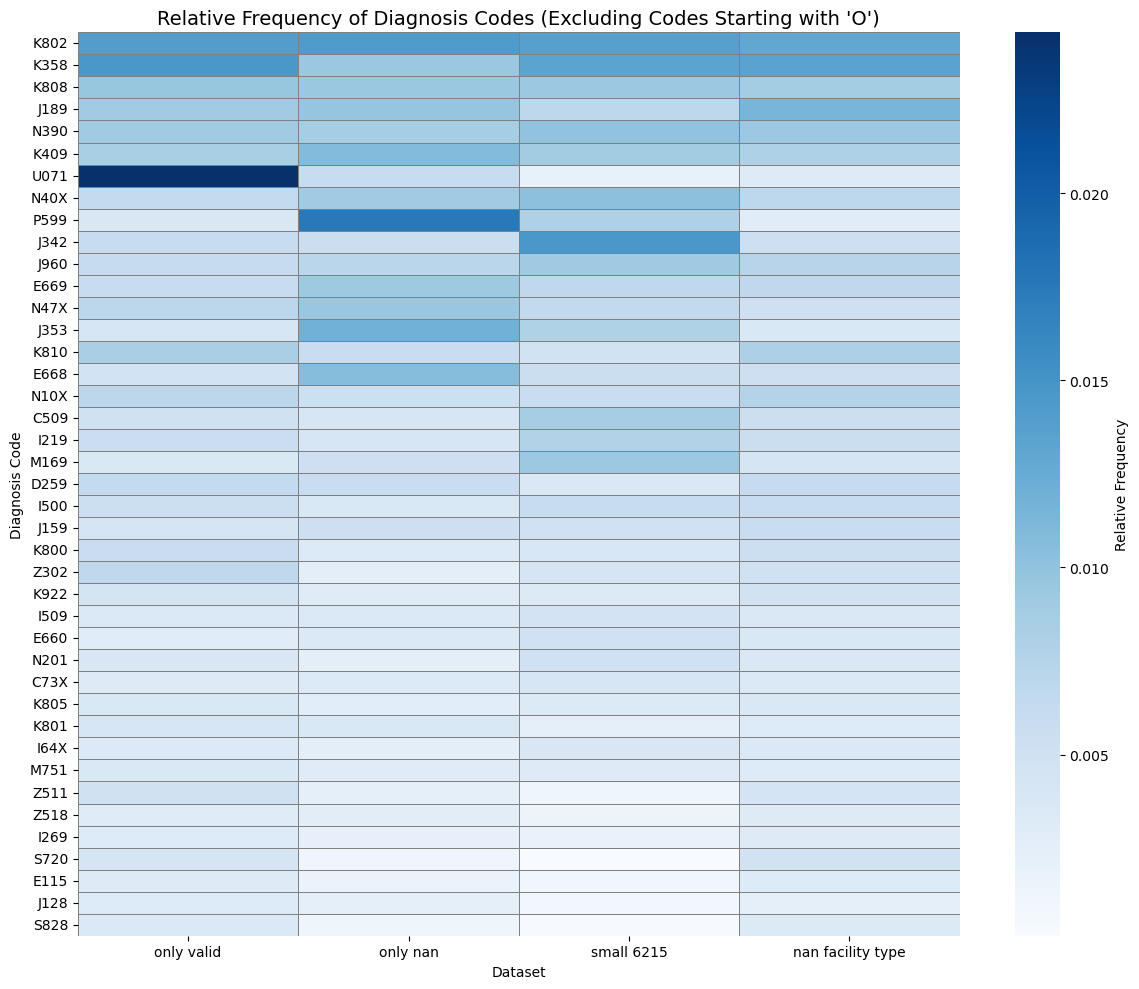

In [145]:


# Step 2: Drop 'average' column if present
if "average" in relative_freq_df_no_O.columns:
    heatmap_data = relative_freq_df_no_O.drop(columns="average")
else:
    heatmap_data = relative_freq_df_no_O.copy()

# Step 3: Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    cmap="Blues",
    linewidths=0.5,
    linecolor='gray',
    annot=False,  # Set to True if you want to see values
    cbar_kws={'label': 'Relative Frequency'}
)

plt.title("Relative Frequency of Diagnosis Codes (Excluding Codes Starting with 'O')", fontsize=14)
plt.xlabel("Dataset")
plt.ylabel("Diagnosis Code")
plt.tight_layout()
plt.show()

Comparing the diagnoses between the dataframes that hold valid and missing values in the columns already analyzed, the relative frequency ot is higher than 2% for COVID when all the columns have valid values. This makes sense beecause it was really important to trace the patients and the potencial spread of the disease

In [147]:
df.shape

(6003601, 9)

Length of stay

In [154]:
# There are outliers that have to be assesed in the analysis. Probably represent long stays related to mental health issues, as seen in 2001-2020 data
df["Length of stay"].describe()

count    6.003601e+06
mean     6.274454e+00
std      4.672092e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      2.223900e+04
Name: Length of stay, dtype: float64

Discharge condition

In [151]:
# Mostly people are alive after the discharge, as expected
df["Discharge condition"].value_counts()

Discharge condition
1    5844040
2     159561
Name: count, dtype: int64

# Export data ready to joint/merge it with data from 2001 to 2020

In [ ]:
df.to_parquet('Egresos_2021-2024.parquet', index=False, compression="gzip") 

In [ ]:
df.to_csv("Egresos_2021-2024.csv", index = False)

# Summary of key decisions and insights:

Insights:
1. The missigness of the data followed a structured pattern which did not show a significative diffrence between valid and null data for key columns (discharge condition, length of stay, diagnoses)
2. Just the column "Healthcare facilty type" has a high amount of null values (around 26%), always for the year 2023 (1.484.159 out of 1.651.836 values)  when the rest of the columns are valid
3. The structured missingness is not biasing or distorting the insights that will be drawn from the complete variables
4. 74% of the data are duplicates, showing that the variables are not specific to describe a patient (example. dataframes have age ranges, not exact ages)
5. Diagnosis codes are diverse and have similar representativeness among valid and null value columns, showing that the missingess is not affecting this variable
6. Length of stay have important outliers that disort the distribution of the data. THey will be assesed in the analysis stage

Decisions:
1. Null values were kept considering are not biasing insights. Doing this matters to avoid losing valuable data from valid value columns. However, null values will be flagged in the analysis
2. Only men and women are considered in variable "Sex". The rest are deleted
3. The ages were grouped properly in certain age ranges that will be used also with data from 2001 to 2020, which has exact ages for each row/patient
4. Only Fonasa and Isapres are considered in "Healthcare insurance", to focus on the private/public healthcare insurance market dynamic in the analysis
5. Duplicates are not deleted because it is not possible to distinguish between data entry errors and real patients, due to a lack of patient IDs or Hospital names in the dataframes. Representing 74%, deleting duplicates would mean the loss of valuable data.
6. Births will be excluded from the joint dataframe before the analysis, as the do not represent healthcare issues neccesarily. This helps reducing the dataframe size, enhancing processing efficiency.

# PASAR TODO A README E INFORME ¡¡ESTO TOCA!!

# insights por escalerecer:
1. Porque healthcare facility tiene tantos NaN el año 2023?
2. Por qué la agrupación de pacientes según año es mejor cuando healthcare facility type es nulo?
3. is there a reason behind of grouping the age of the people differently when the healthcare facility type is valid compared to NaN?